# Curso FIC - Aula 05 - Teste A/B e simulação estatística

11/10/2021 

Piracicaba - SP

Gustavo Voltani von Atzingen

## Tópicos

* Método de Monte Carlo para cálculo de probabilidades

* Gerando distribuições estatísticas com MC

* Distribuição Binomial - Curva Gaussiana

* Testes A/B

* Testes de hipótese

* Testes frequentistas vs Boostrap (MC)

* Probabilidade de probabilidades

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import plotly
from plotly.graph_objs import graph_objs as go

# plotly.offline.init_notebook_mode()

## Cálculo de probablilidades com Monte Carlo

* 
* Stanislaw Ulam
* John von Neumann

### Calculo de pi

https://www.youtube.com/watch?v=M34TO71SKGk

In [30]:
qt_amostras = 100000

In [31]:
pt = 2*np.random.random((qt_amostras, 2)) - 1

In [32]:
dist = np.sqrt(pt[:, 0]**2 + pt[:, 1]**2)

In [33]:
np.where(dist < 1)[0]

array([    0,     2,     3, ..., 99997, 99998, 99999], shape=(78678,))

In [34]:
len(np.where(dist < 1)[0])

78678

In [35]:
pi = 4*len(np.where(dist < 1)[0])/qt_amostras
print(pi)

3.14712


### Qual a chance de ganhar um ataque no war ?

In [53]:
a = np.random.choice(range(1, 7), (2, 3))
print(a)
a.argmax(axis=0)

[[2 4 5]
 [3 2 3]]


array([1, 0, 0])

In [38]:
def rodada():
    jogada = np.random.choice(range(1, 7), (2, 3))
    jogada.sort()
    return jogada.argmax(axis=0).sum()

In [55]:
dados_j1, dados_j2 = [500], [500]
while dados_j1[-1] > 2 and dados_j2[-1] > 2:
    nota = rodada()
    dados_j1.append(dados_j1[-1] - nota)
    dados_j2.append(dados_j2[-1] - 3 + nota)

In [56]:
px.line(x=range(len(dados_j1)), y=[dados_j1, dados_j2], height=600)

In [58]:
print(dados_j1[-1]/500)

0.406


Tenho 10 exércitos e quero atacar um  inimigo com 5 exércitos, qual a chance de ganhar ?

In [66]:
def rodada_completa(ex_atacante: int, ex_defensor: int):
    if ex_atacante <= 1 or ex_defensor <= 0:
        return (0, 0)  # não há combate possível

    n_att = min(3, ex_atacante - 1)
    n_def = min(2, ex_defensor)

    att = np.sort(np.random.randint(1, 7, size=n_att))[::-1]
    deff = np.sort(np.random.randint(1, 7, size=n_def))[::-1]

    n_comp = min(n_att, n_def)
    perdas_atk = sum(att[i] <= deff[i] for i in range(n_comp))  # empate é do defensor
    perdas_def = n_comp - perdas_atk
    return (perdas_atk, perdas_def)

In [67]:
def batalha(ex_atacante: int, ex_defensor: int):
    if ex_atacante <= 1 or ex_defensor <= 0:
        return (ex_atacante, ex_defensor)

    pa, pd = rodada_completa(ex_atacante, ex_defensor)
    return batalha(ex_atacante - pa, ex_defensor - pd)

In [85]:
resultado = batalha(10, 7)
print(f"Atacante restante: {resultado[0]}, Defensor restante: {resultado[1]}")

Atacante restante: 1, Defensor restante: 4


In [86]:
def prob_vitoria(atac: int, deff: int, n_sim: int = 10000):
    vitorias = 0
    for _ in range(n_sim):
        fa, fd = batalha(atac, deff)
        if fd == 0: 
            vitorias += 1
    return vitorias / n_sim

In [88]:
p = prob_vitoria(10, 5, n_sim=50000)
print(f"Probabilidade de vitória do atacante: {p:.3f}")

Probabilidade de vitória do atacante: 0.873


## Distribuição binomial

In [13]:
passos = 100
trials = 500

resultado_total = np.random.choice((-1, 1), (trials, passos))

In [14]:
resultado = resultado_total.sum(axis=1)

In [15]:
resultado[0]

np.int64(4)

In [16]:
px.histogram(resultado, height=600)

In [17]:
def make_distribution(passos, trials):
    resultado_total = np.random.choice((-1, 1), (trials, passos))
    resultado = resultado_total.sum(axis=1)
    fig = go.Figure(data=go.Histogram(x=resultado))
    fig.show()

In [90]:
from ipywidgets import interact

interact(make_distribution, passos=(1, 1000), trials=(1, 10000))

interactive(children=(IntSlider(value=500, description='passos', max=1000, min=1), IntSlider(value=5000, descr…

<function __main__.make_distribution(passos, trials)>

##

$$ \Large P(k; n,p) =  \binom{n}{k} \cdot p^k \cdot (1 - p)^{n=k} $$

onde: $$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$


Para distribuições contínuas:

$$ \Large f(x) = \frac{1}{\sigma \cdot \sqrt{2 \pi}} e^{\frac{1}{2}(\frac{x - \mu}{\sigma})^2}  $$


$$ \Large \sigma = \sqrt{\frac{1}{N} \sum{(x_i - \mu)^2} }  $$

## Precisa de apenas dois valores para definir as informações: média e desvio padrão
&nbsp;

Muito bom para ser verdade
&nbsp;

&nbsp;

## Muitas coisas observadas possuem esse padrão (curva no formato de sino)

&nbsp;

Peso, altura, notas, falhas em equipamentos, etc

&nbsp;

## Teorema do limite central

&nbsp;

&nbsp;

Bom demais para ser verdade ?

## Se em grande quantidade os dados obedecem a esta forma, podemos usar esse fato para calcular e obter informações sobre nossas observações

&nbsp;

## Observação:  Medida do uso de um site, tempo de recuperação ao tomar um medicamento, inadimplencia de um empréstimo, ...

## Teste de Hipótese

* Mudar a cor do botão de "comprar" do meu site aumenta as vendas ?
  
&nbsp;

* Tomar este medicamento diminui a chance de morrer de tal doença ?

&nbsp;
* Adicionar X na nutrição de um animal aumenta sua taxa de crescimento ?

&nbsp;
* Estratégia X de ensino é melhor que a estratégia Y ? 
  * Visual learners
  * Salario vs aprendizado
  * Tempo de Estudo
  * Qualificação dos professores

&nbsp;
* Pessoas com bom humor tem mais chance de dar uma nota boa a um candidato ?

&nbsp;
* Signo afeta resultados de teste de personalidade ?

&nbsp;
* Pessoas com um lápis na boca tem mais chance de dar uma boa nota a um candidato a emprego ?

## Essa moeda é justa ?

30 lançamentos, 22 cara

In [ ]:
trials = 10000
resultado_total = np.random.choice((0, 1), (trials, 30))

In [ ]:
resultado = resultado_total.sum(axis=1)

In [ ]:
qt = len(np.where(resultado >= 22)[0])

In [ ]:
print(qt/trials)

0.0062


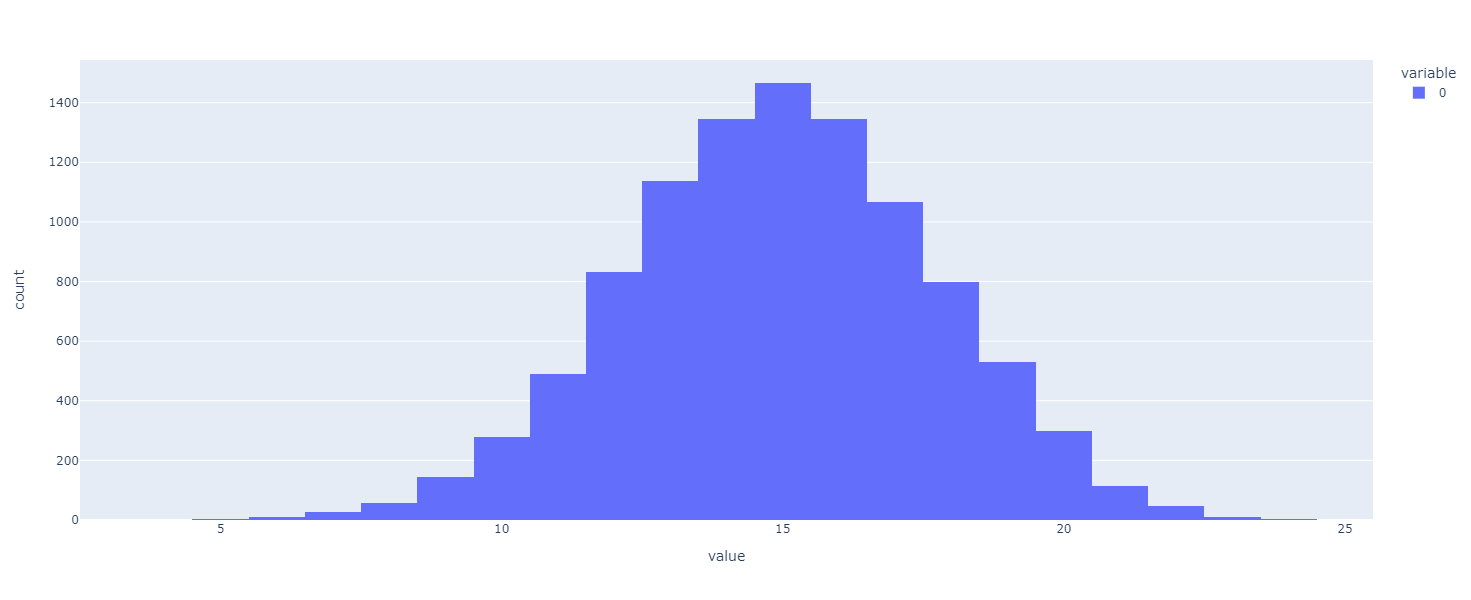

In [ ]:
px.histogram(resultado, height=600)

## Caso em que não conhecemos bem o funcionamento do sistema

## A/B Test

In [93]:
A = np.array([84, 72, 57, 46, 63, 76, 99, 91])
B = np.array([81, 69, 74, 61, 56, 87, 69, 56, 66, 44, 62, 69])

In [ ]:
from statsmodels.stats.weightstats import ttest_ind

t, p, dof = ttest_ind(A, B, alternative='larger', usevar='unequal')

t-statistic: 1.0293
p-value: 0.1627
degrees of freedom: 11.0

Interpretação:
Grupo A média: 73.50
Grupo B média: 66.17
Diferença das médias: 7.33
Resultado não significativo (p >= 0.05): não há evidência suficiente de diferença


In [96]:
print(f"t-statistic: {t:.4f}")
print(f"p-value: {p:.4f}")
print(f"degrees of freedom: {dof:.1f}")
print(f"\nInterpretação:")
print(f"Grupo A média: {A.mean():.2f}")
print(f"Grupo B média: {B.mean():.2f}")
print(f"Diferença das médias: {A.mean() - B.mean():.2f}")
if p < 0.05:
    print("Resultado significativo (p < 0.05): há evidência de diferença entre os grupos")
else:
    print("Resultado não significativo (p >= 0.05): não há evidência suficiente de diferença")

t-statistic: 1.0293
p-value: 0.1627
degrees of freedom: 11.0

Interpretação:
Grupo A média: 73.50
Grupo B média: 66.17
Diferença das médias: 7.33
Resultado não significativo (p >= 0.05): não há evidência suficiente de diferença


### ttest_ind(A, B, alternative='larger', usevar='unequal')

**Return values**
- **t (t-statistic)**  
  Ratio of observed mean difference to the standard error of the difference:  
  \[
  t = \frac{\bar{X}_A - \bar{X}_B}{SE}
  \]  
  Large |t| = stronger evidence against the null hypothesis.

- **p (p-value)**  
  Probability of observing a statistic as extreme as `t` under the null hypothesis.  
  With `alternative="larger"`, it is the probability that mean(A) ≤ mean(B) but the data look at least this extreme.

- **dof (degrees of freedom)**  
  Effective sample size adjustment for variance estimation.  
  With `usevar="unequal"`, Welch–Satterthwaite formula applies:  
  \[
  df = \frac{\left(\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}\right)^2}{\frac{(s_A^2/n_A)^2}{n_A-1} + \frac{(s_B^2/n_B)^2}{n_B-1}}
  \]

---

**Parameters**

- **alternative**  
  - `"two-sided"`: \(H_0: \mu_A = \mu_B\) vs \(H_1: \mu_A \neq \mu_B\)  
  - `"less"`: \(H_0: \mu_A \geq \mu_B\) vs \(H_1: \mu_A < \mu_B\)  
  - `"greater"` / `"larger"`: \(H_0: \mu_A \leq \mu_B\) vs \(H_1: \mu_A > \mu_B\)

- **usevar**  
  - `"pooled"`: Student’s t-test, assumes equal variances.  
  - `"unequal"`: Welch’s t-test, robust to unequal variances/sample sizes.  
  - `"bf"`: Bayesian approximation (rarely used).

---

**Summary**
- `t`: standardized mean difference.  
- `p`: probability under null.  
- `dof`: degrees of freedom, exact (pooled) or approximate (unequal).  
- `alternative`: test direction.  
- `usevar`: variance assumption.


## Se os grupos são iguais, não deve importar alterar elementos do grupo A para o B e vice versa

* Shuffle

* Rearranja

* Calcula a média

In [97]:
diferenca = A.mean() - B.mean()
print(diferenca)

7.333333333333329


In [98]:
trials = 10000
diferencas = np.zeros(trials)
total = np.concatenate((A, B)) 
for i in range(trials):
    np.random.shuffle(total)
    A_new = total[:8]
    B_new = total[8:]
    diferenca = A_new.mean() - B_new.mean()
    diferencas[i] = diferenca

In [99]:
px.histogram(diferencas, height=600)

In [100]:
np.where(diferencas > 7.7)[0].size/trials

0.1324

## Referências e leituras complementares

[t-student](https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_t_de_Student)

[binomial](https://en.wikipedia.org/wiki/Binomial_distribution)

[pycon - statistics for hackers](https://www.youtube.com/watch?v=Iq9DzN6mvYA)

[3blue1brown - Binomial](https://www.youtube.com/watch?v=8idr1WZ1A7Q)

[3blue1brown - Binomial pt2](https://www.youtube.com/watch?v=ZA4JkHKZM50)